In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

This study is based on the following article:

**"Exploring the Relation between Technical Debt and Software Trustworthiness"**

In [ ]:
data = pd.read_excel("/content/drive/My Drive/tech_debt_ml/dataset-mean-ml.xlsx")

We selected 106 different Android projects for this research. 16 different metrics of the projects were calculated as stated in the article.

External metrics were measured with Sonar, while internal Quality metrics were analyzed with the Understand tool.
33 of the 106 projects were taken from the article, 73 of them were added later to expand the research.

During the work with the Understand tool, the Java source codes of all projects were analyzed and their internal metrics were measured one by one. The average values of the metrics were taken and added to the dataset.

**External metrics that measured with Sonar:**

*   Number of Bugs
*   Vulnerabilities
*   Security Hotspots
*   Code Smells
*   Code Duplication Ratio (%)
*   Technical Debt (hours)



---



**Internal metrics measured with Understand:**
*   NOC->CountClassDerived
*   CBO->CountClassCoupled
*   LCOM->PercentLackOfCohesion
*   FanIn->CountInput
*   FanOut->CountOutput
*   RFC->CountDeclMethodAll
*   DIT->MaxInheritanceTree
*   WMC->SumCyclomatic
*   LOC->CountLineCode
*   CLOC->CountLineComment





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   106 non-null    object 
 1   Bugs                   106 non-null    int64  
 2   Vulnerabilities        106 non-null    int64  
 3   Security Hotspots      106 non-null    int64  
 4   Code Smells            106 non-null    int64  
 5   Code Duplication       106 non-null    float64
 6   Debt                   106 non-null    float64
 7   CountClassDerived      106 non-null    float64
 8   CountClassCoupled      106 non-null    float64
 9   CountDeclMethodAll     106 non-null    float64
 10  CountLineCode          106 non-null    float64
 11  CountLineComment       106 non-null    float64
 12  CountInput             106 non-null    float64
 13  CountOutput            106 non-null    float64
 14  PercentLackOfCohesion  106 non-null    float64
 15  SumCyc

In [ ]:
data.head(3) #First 3 samples of the our dataset:

,Name,Bugs,Vulnerabilities,Security Hotspots,Code Smells,Code Duplication,Debt,CountClassDerived,CountClassCoupled,CountDeclMethodAll,CountLineCode,CountLineComment,CountInput,CountOutput,PercentLackOfCohesion,SumCyclomatic,MaxInheritanceTree
0,04-android_vtv_movies-master.csv,31,41,5,986,3.2,144.0,0.318182,1.821212,9.030303,22.575592,7.420765,2.660731,2.536073,25.01235,4.886703,1.445455
1,08-android-emulator-plugin-master.csv,24,14,72,180,0.8,20.0,0.260417,2.729167,7.708333,39.121131,7.942127,3.451282,4.131624,16.28736,5.792732,1.677083
2,09-AndroidEntryManagerSonar-master.csv,0,0,1,172,5.1,15.0,0.030928,1.876289,6.752577,26.702635,3.391468,1.929771,2.882443,23.65979,4.361355,1.670103


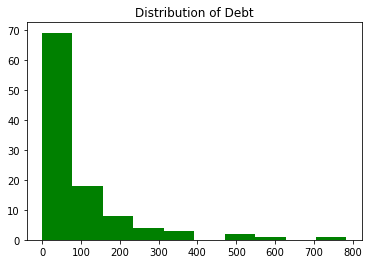

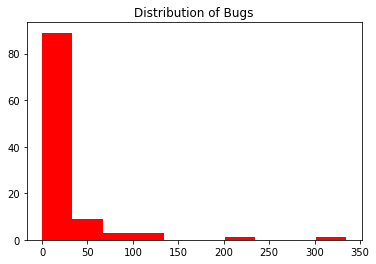

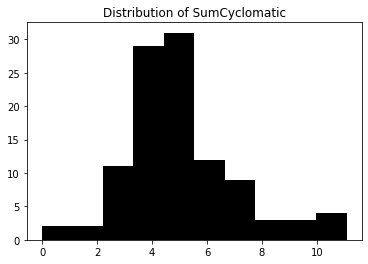

In [ ]:
def plotHist(columnName,colorName):
  plt.hist(data[columnName].to_numpy(),color=colorName)
  plt.title("Distribution of "+ columnName)
  plt.show()


plotHist("Debt","g")
plotHist("Bugs","r")
plotHist("SumCyclomatic","black")

#Since the Technical Debt isn't normalized very well, we are going to use Pearson Correlation

After the visualizations made with graphics, we see that our data is not distributed in accordance with the Normal Distribution. Therefore,  we will prefer Spearman Correlation method instead of Pearson correlation.

**Since we have different data types and ranges in our data set, min-max normalization has been applied to all the data we have:**

In [ ]:
#Min max scaler for all data
scaler = MinMaxScaler()
data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])

In [ ]:
data.describe()

,Bugs,Vulnerabilities,Security Hotspots,Code Smells,Code Duplication,Debt,CountClassDerived,CountClassCoupled,CountDeclMethodAll,CountLineCode,CountLineComment,CountInput,CountOutput,PercentLackOfCohesion,SumCyclomatic,MaxInheritanceTree
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.060406,0.089623,0.138441,0.121435,0.114402,0.117754,0.252741,0.521089,0.253160,0.353026,0.201125,0.439979,0.600318,0.459449,0.458766,0.698045
std,0.133719,0.174023,0.216211,0.172243,0.181750,0.166572,0.209529,0.221667,0.157739,0.192267,0.184416,0.143089,0.165977,0.197633,0.180766,0.152068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.014357,0.000000,0.019452,0.064668,0.370998,0.146700,0.221228,0.076072,0.363879,0.502673,0.328595,0.347737,0.614363
50%,0.013433,0.023006,0.036145,0.049225,0.045852,0.056122,0.236537,0.526231,0.221829,0.308550,0.141302,0.437671,0.618659,0.462930,0.429517,0.715127
75%,0.064179,0.073620,0.177711,0.148587,0.138646,0.142857,0.364975,0.665194,0.318650,0.482179,0.261387,0.518743,0.691435,0.572134,0.524462,0.787941
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# RESEARCH METHOD

We will conduct our research similar to what is written in the article. We will carry out the work in two different stages.

# Phase 1: 
Investigating the relationships between CK and additional design level metrics as indicators of internal quality with external quality metrics for the evaluation of trustworthiness. We evaluate the trustworthiness with internal and external metrics separately for reliability and security quality attributes.

 The research question 1 (RQ1) serves the phase 1 objective as below:
 # RQ1:
  Is there any relationship between internal quality metrics (CK and additional metrics) and external quality metrics of trustworthiness?

We explore the relation between TD and trustworthiness metrics through the hypothesis given below:

*  H1 Complexity metrics positively correlate to the number of vulnerabilities
*  H2 Complexity metrics positively correlate to the number of bugs
*  H3 Complexity metrics positively correlate to the number of security hotspots
*  H4 Complexity metrics positively correlate to the number of code smells


---


*  H5 Coupling metrics positively correlate to the number of vulnerabilities.
*  H6 Coupling metrics positively correlate to the number of bugs.
*  H7 Coupling metrics positively correlate to the number of security hotspots
*  H8 Coupling metrics positively correlate to the number of code smells.


---
*  H9 Cohesion metric negatively correlate to the number of vulnerabilities.
*  H10 Cohesion metric negatively correlate to the number of bugs.
*  H11 Cohesion metric negatively correlate to the number of security hotspots.
*  H12 Cohesion metric negatively correlate to the number of code smells


---

---

---




# Correlation Matrix of the metrics

First, we will examine the correlations between metric values. As we have seen above, we will use the Spearman Correlation since the data are not suitable for Normal Distribution.

We followed the significance level (ρ) between each metric and considered the relation significance if the significance level is under 0.1 (<10%)

---

---

---

• 0 < rs <= 0.25 : weak relationship

• 0.25 < rs <= 0.75 : intermediate relationship

• rs > 0.75 : strong relationship






In [ ]:
corrMatrix = data.iloc[:,1:].corr(method="spearman")
corrMatrix

,Bugs,Vulnerabilities,Security Hotspots,Code Smells,Code Duplication,Debt,CountClassDerived,CountClassCoupled,CountDeclMethodAll,CountLineCode,CountLineComment,CountInput,CountOutput,PercentLackOfCohesion,SumCyclomatic,MaxInheritanceTree
Bugs,1.000000,0.724622,0.606188,0.738145,0.364621,0.703819,0.297485,0.380010,0.430701,0.355587,0.377180,0.425866,0.185443,0.218844,0.570075,0.216627
Vulnerabilities,0.724622,1.000000,0.600064,0.735577,0.349814,0.710896,0.267589,0.382614,0.320382,0.328213,0.269131,0.457587,0.233264,0.214434,0.480178,0.177040
Security Hotspots,0.606188,0.600064,1.000000,0.585844,0.319373,0.518403,0.421256,0.504185,0.434440,0.223010,0.311246,0.436416,0.178839,0.059861,0.455932,0.119657
Code Smells,0.738145,0.735577,0.585844,1.000000,0.489678,0.886459,0.270827,0.514722,0.394143,0.416221,0.281622,0.459325,0.289352,0.222347,0.568335,0.188230
Code Duplication,0.364621,0.349814,0.319373,0.489678,1.000000,0.487574,0.057926,0.173636,0.129771,0.205527,0.101373,0.163667,0.103305,0.046703,0.221253,0.181565
Debt,0.703819,0.710896,0.518403,0.886459,0.487574,1.000000,0.237925,0.455446,0.298160,0.326835,0.232000,0.423365,0.241773,0.170640,0.459256,0.282741
CountClassDerived,0.297485,0.267589,0.421256,0.270827,0.057926,0.237925,1.000000,0.566083,0.607410,-0.235562,0.219155,0.110731,-0.248782,0.036074,0.103160,-0.110677
CountClassCoupled,0.380010,0.382614,0.504185,0.514722,0.173636,0.455446,0.566083,1.000000,0.501029,0.126405,0.207889,0.551577,0.187031,0.172773,0.443909,0.018680
CountDeclMethodAll,0.430701,0.320382,0.434440,0.394143,0.129771,0.298160,0.607410,0.501029,1.000000,0.039908,0.427598,0.289471,-0.086703,0.485574,0.456625,0.083704
CountLineCode,0.355587,0.328213,0.223010,0.416221,0.205527,0.326835,-0.235562,0.126405,0.039908,1.000000,0.246720,0.649233,0.699816,-0.060640,0.722095,0.230819


In [ ]:
#P Value

from scipy.stats import spearmanr,pearsonr

def pearsonr_pval(x,y):
    return float("{:.4f}".format(pearsonr(x,y)[1]))

def spearmanr_pval(x,y):
    return float("{:.4f}".format(spearmanr(x,y)[1]))

print("P values of Spearman Correlation Table:")
data.iloc[:,1:].corr(method=spearmanr_pval)

P values of Spearman Correlation Table:


,Bugs,Vulnerabilities,Security Hotspots,Code Smells,Code Duplication,Debt,CountClassDerived,CountClassCoupled,CountDeclMethodAll,CountLineCode,CountLineComment,CountInput,CountOutput,PercentLackOfCohesion,SumCyclomatic,MaxInheritanceTree
Bugs,1.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0020,0.0001,0.0000,0.0002,0.0001,0.0000,0.0570,0.0242,0.0000,0.0257
Vulnerabilities,0.0000,1.0000,0.0000,0.0000,0.0002,0.0000,0.0056,0.0001,0.0008,0.0006,0.0053,0.0000,0.0161,0.0273,0.0000,0.0694
Security Hotspots,0.0000,0.0000,1.0000,0.0000,0.0008,0.0000,0.0000,0.0000,0.0000,0.0216,0.0012,0.0000,0.0666,0.5422,0.0000,0.2218
Code Smells,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0050,0.0000,0.0000,0.0000,0.0034,0.0000,0.0026,0.0220,0.0000,0.0533
Code Duplication,0.0001,0.0002,0.0008,0.0000,1.0000,0.0000,0.5553,0.0751,0.1849,0.0346,0.3011,0.0937,0.2920,0.6345,0.0227,0.0625
Debt,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0141,0.0000,0.0019,0.0006,0.0167,0.0000,0.0125,0.0803,0.0000,0.0033
CountClassDerived,0.0020,0.0056,0.0000,0.0050,0.5553,0.0141,1.0000,0.0000,0.0000,0.0151,0.0240,0.2585,0.0101,0.7135,0.2927,0.2587
CountClassCoupled,0.0001,0.0001,0.0000,0.0000,0.0751,0.0000,0.0000,1.0000,0.0000,0.1966,0.0325,0.0000,0.0549,0.0766,0.0000,0.8493
CountDeclMethodAll,0.0000,0.0008,0.0000,0.0000,0.1849,0.0019,0.0000,0.0000,1.0000,0.6846,0.0000,0.0026,0.3768,0.0000,0.0000,0.3936
CountLineCode,0.0002,0.0006,0.0216,0.0000,0.0346,0.0006,0.0151,0.1966,0.6846,1.0000,0.0108,0.0000,0.0000,0.5369,0.0000,0.0173




> Conversely, a P-value of >.05 only indicates that the evidence is inadequate to reject the null hypothesis, and the alternative hypothesis (the opposite of the null hypothesis) that the observed differences between the groups is real or not due to chance is not accepted. As a consequence, the study results are unlikely to have occurred by chance.

> However, it does not imply that the null hypothesis is true, and that the test treatment and control (e.g. standard treatment, placebo, or baseline) in the study are equivalent. The study itself may have the weakness such as a small sample size to detect a clinically important difference as statistically significant.

> For example, a P-value of 0.08, albeit not significant, does not mean ‘nil’. There is still an 8% chance that the null hypothesis is true. A P-value alone cannot be used to accept or reject the null hypothesis. The cut-off level of 0.05 is purely arbitrary and gives no indication as to the clinical significance of any observed differences.
 
**Source**: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2897873/

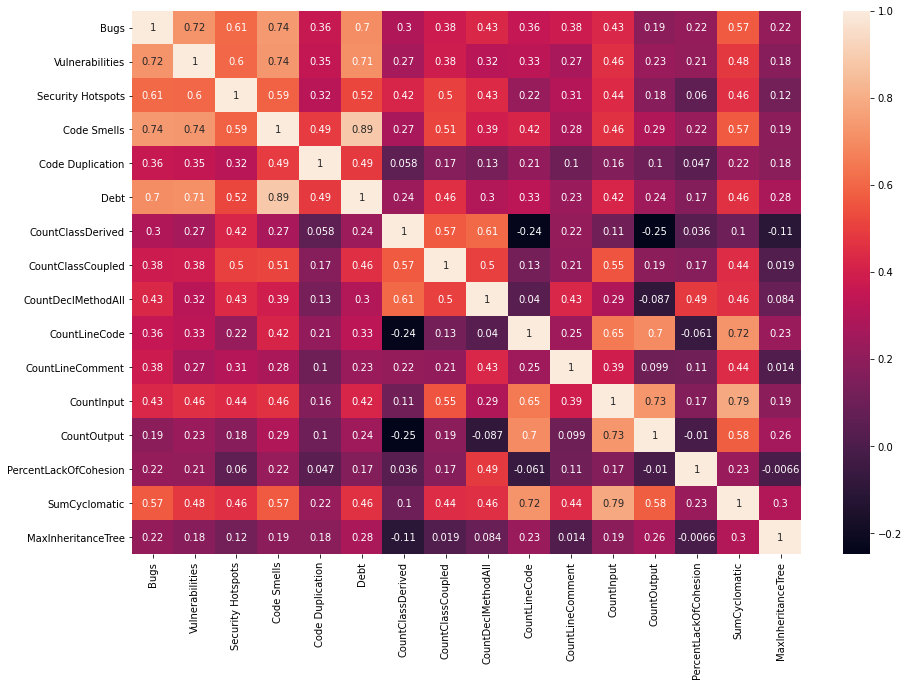

In [ ]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()


> 0 < rs <= 0.25 : weak relationship

> 0.25 < rs <= 0.75 : intermediate relationship

> rs > 0.75 : strong relationship



---



---



**Number Of Bugs:**

* There is a positive intermediate relationship between "Number of Bugs" and CountClassDerived,CountClassCoupled,CountDeclMethodAll,CountLineCode, CountLineComment,CountInput and SumCyclomatic internal metrics.

* There is also a weak relation with CountOutput,MaxInheritanceTree and PercentLackOfCohesion.


---



---


**Vulnerabilities:**

* There is a positive intermediate relationship between "Vulnerabilities" and CountClassDerived,CountClassCoupled,CountDeclMethodAll,CountLineCode, CountLineComment,CountInput and SumCyclomatic internal metrics. 

* Weak relation with CountOutput,MaxInheritanceTree and PercentLackOfCohesion 


---
---

**Security Hotpots:**

* There are positive intermediate relationships between "Security Hotpots" and CountClassDerived,CountClassCoupled,CountDeclMethodAll, CountLineComment,CountInput and SumCyclomatic

* There are positive but weak relationships with CountLineCode,CountOutput

* There is a weak positive relation with PercentLackOfCohesion(LCOM) but P-value is too large for this correlation.So it is not included
* There is also one more weak positive relation with MaxInheritanceTree(DIT) but P-value is too large to analyze (so this one also is not included)
---
---

**Code Smells:**

* There are positive intermediate relationships between "Code Smells" and CountClassDerived,CountClassCoupled,CountDeclMethodAll CountLineComment, CountLineCode, CountInput, CountOutput, and SumCyclomatic

* There are positive but weak relations with PercentLackOfCohesion and MaxInheritanceTree

# RQ1. Results for relation between Internal and External Trustworthiness Metrics


If we summarize the analysis we performed above, we can create a table like the one below.
We will try to verify the 12 hypotheses we have stated in the hypotheses section based on the results below:

---



---



**Number Of Bugs:**

> **Positive intermediate relationship:** NOC,CBO,RFC,LOC,CLOC,FanIn,WMC

> **Positive weak relationship:** FanOut, DIT,LCOM

---
---


**Vulnerabilities:**
> **Positive intermediate relationship:** NOC,CBO,RFC,LOC,CLOC,FanIn,WMC

> **Positive weak relationship:** FanOut, DIT,LCOM

---
---

**Security Hotpots:**

> **Positive intermediate relationship:** NOC,CBO,RFC,CLOC,FanIn,WMC

> **Positive weak relationship:** LOC,FanOut,

* There is a weak positive relation with PercentLackOfCohesion(LCOM) but P-value is too large for this correlation.So it is not included

* There is also one more weak positive relation with MaxInheritanceTree(DIT) but P-value is too large to analyze (so this one is not included)
---
---

**Code Smells:**

> **Positive intermediate relationship:** NOC,CBO,RFC,CLOC,LOC,FanOut,FanIn,WMC

> **Positive weak relationship:** DIT,LCOM



# Evaluation of Phase - 1
**Validation of Hypotheses**


** H1, H2, H3 and H4 ** hypotheses are established for the relationships between complexity metrics and External metrics.

**External metrics:** Number Of Bugs,Vulnerabilities,Security Hotpots and Code Smells

**Internal Complexity Metrics:** DIT, RFC, WMC and LOC


All complexity metrics other than DIT have positive significant correlations with external metrics (See above).

DIT is also positively correlated with three of these external metrics, but since the P value between Security Hotpots is greater than 0.1, no firm judgment can be made between these two metrics.

Therefore,
**H1,H2 and H4 validated. H3 is partially validated.**



---



---



---




H5,H6,H7 and H7 are about relations between Internal Coupling metrics(CBO,FanOut,FanIn) and External Quality metrics(Number Of Bugs,Vulnerabilities,Security Hotspots and Code Smells).


All Internal Coupling metrics are positively and significantly correlated with all external quality metrics that shown above. 

**Therefore, H5,H6,H7 and H7 are validated**



---



---



---





**H9, H10, H11 and H12** are related with correlation of cohesion metrics and external quality metrics.

**H9, H10, and H12 validated** , since a positive relationship is observed between LCOM and "vulnerability", "number of bugs" and "code smells" external
metrics. It means that there is a negative correlation between cohesion and external metrics.


However, there is a problem with the H11 hypothesis. There is a positive correlation between LCOM (PercentLackOfCohesion) and "Security Hotpots" but this correlation is not significant enough.
The P value between these two metrics is 0.5422. For this reason, the significance level condition cannot be met.

**This is why we cannot make an exact validation of the H11**



# Phase 2:
Investigating the relationships between TD and trustworthiness metrics. The
research question 2 (RQ2) that serves the phase 2 objective has been formulated as follows:


#RQ2:
**Do software components with technical debt appear as less trustworthy? In order to answer this question, we divided it into 2 sub-questions:**

> RQ2.1. Does trustworthiness with respect to internal quality metrics have a relation with TD?

> RQ2.2. Does TD have a relation with trustworthiness with respect to external quality metrics?



After findings from H1 to H12, we investigate for whether trustworthiness metrics and TD is closely related with each other in case of H13 and H14:

> **H13-** Software components with technical debt less likely indicate a trustworthy
software with respect to internal trustworthiness.

> **H14-** Software components with technical debt less likely indicate a trustworthy
software with respect to external trustworthiness


In order to evaluate RQ2.1, results for H13 that is defined as "Software components with technical debt are less likely indicate a trustworthy software with respect to internal trustworthiness" are discussed in this part.. By constructing this hypothesis, it is aimed to see if TD can be used as an indicator of lacking software internal trustworthiness. To observe and find this relationship, we firstly analyzed the relationship between internal trustworthiness and TD. Then, for the answering RQ2.2, we analyzed the relationship between TD and external trustworthiness in light of H14 that is defined as "Software components with technical debt are less likely indicate a trustworthy software with respect to external trustworthiness".

To measure the technical debt, we used two metrics- Technical Debt(TD) and Code Duplication Ratio(CDR) metrics; and to measure the trustworthiness, we used
14 different internal and external metrics- **number of bugs, vulnerability, security hotspots, code smells, NOC,CBO,DIT, RFC, WMC, LCOM, CLOC, LOC,FanIn, FanOut metrics.** 



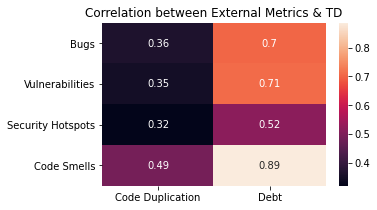

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5,3))
sns.heatmap(corrMatrix.iloc[:4,4:6], annot=True,ax=ax1)
plt.title("Correlation between External Metrics & TD")
plt.show()


**External trustworthiness metrics have a significant and moderate positive relationship with Technical Debt and Code Duplication Rate**.There is also a strong positive relationship between Code Smells and Technical Debt.

All P values are less than 0.1.Therefore, we can say that all external metrics have a positive and significant relationship with Technical Debt and Code Duplication Rate.

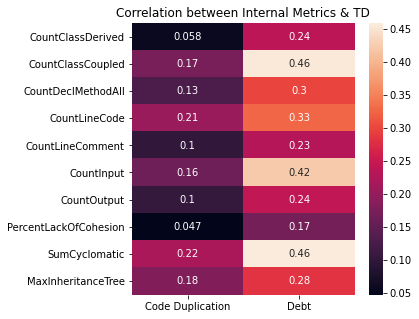



P values:


,Code Duplication,Debt
CountClassDerived,0.5553,0.0141
CountClassCoupled,0.0751,0.0000
CountDeclMethodAll,0.1849,0.0019
CountLineCode,0.0346,0.0006
CountLineComment,0.3011,0.0167
CountInput,0.0937,0.0000
CountOutput,0.2920,0.0125
PercentLackOfCohesion,0.6345,0.0803
SumCyclomatic,0.0227,0.0000
MaxInheritanceTree,0.0625,0.0033


In [ ]:
fig2, ax2 = plt.subplots(figsize=(5,5))
sns.heatmap(corrMatrix.iloc[6:,4:6], annot=True,ax=ax2)
plt.title("Correlation between Internal Metrics & TD")
plt.show()

print("\n\nP values:")
p_values = data.iloc[:,1:].corr(method=spearmanr_pval)
p_values.iloc[6:,4:6]

**Internal metrics have a significant and moderate positive relationship with Technical Debt**

**CountClassCoupled(CBO), CountLineCode(LOC),CountInput(FanIn),PercentLackOfCohesion(LCOM),SumCyclomatic(WMC) and MaxInheritanceTree(DIT) have weak positive relations with Code Duplication(CDR)**

However, since P value of the other internal metrics are more than 0.1(see above), we can't prove their correlation with CDR metric.

#Evaluation of Phase-2:

**It can be said that there is a significant connection between external quality metrics and Technical Debt. So, TD can be taken into account as a good indicator of external quality.**

**There seems to be a correlation between most of the Internal metrics and the Technical Debt, although not as strong as above. (Not as strong as External metrics-TD)**

> According to these results, we can assume that external and internal quality could be considered as an indicator of TD.


---


**However, before the final judgment, we will try to expand the work for these two hypotheses and come to a conclusion with machine learning methods.**

In the next part, we will first train our machine learning models with Internal metrics and try to calculate Technical Debt. We will measure the success of the model according to the results from here.

Then, we will send External Quality metrics to our machine learning models as a training set and measure the success rate.

Finally, we will send all internal and external metrics to our ML models as a training set and look at the overall results.





# Technical Debt Estimation By Using ML Regression Models

Since Technical Debt is a numerical data, we will use ML Regression models during the study.

70% of our data will be separated into training sets and 30% as test sets. 70% of our data will be randomly selected for training the model. During this selection, the variable random_state will have a fixed value so that all models get the same data. In this way, we will be able to evaluate the success rate of the models objectively.

R-Square and Mean Square Error methods will be used to calculate the success rate of the models.

Most regression models are sensitive to outlier values. Therefore, the data should be normalized before training. Since we normalized the data in the first part of this project, we will not apply normalization again.

#Establishing Machine Learning Regression Models:

We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
  #Plot the Scatter Graph to see results better
  plt.scatter(y_test,y_pred,s=50,color='b',label='Predicted Values')
  plt.scatter(y_test,y_test,s=50,color='r',label='Original Values')
  plt.legend(loc="upper left")
  plt.title("Regressor Accuracy of "+ regressorName)
  plt.show()


#Linear Regressor is one of the best choice for the data that is correlated linearly:
def linearRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
  reg_all = LinearRegression()
  reg_all.fit(X_train, y_train)
  y_pred = reg_all.predict(X_test)
  # Compute and print R^2 and RMSE
  print("Linear Regression R^2:",r2_score(y_test, y_pred))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Linear Regression- Root Mean Squared Error: {}".format(rmse))
  plotGraph(y_test,y_pred,"Linear Regressor")


#SVR is also one of the most common regressor that used for regression predictions
#Since we have different kernels for Svr Regression model, we will try two of them to get best result:
def svrRegression(X_train,y_train,X_test,y_test):
  for kernelType in ["linear", "rbf",]:
    svRegressor = SVR(kernel = kernelType)
    svRegressor.fit(X_train, y_train)
    y_pred = svRegressor.predict(X_test)
    print(kernelType , " kernel - R-squared:", r2_score(y_test, svRegressor.predict(X_test)))



def decisionTreeRegression(X_train,y_train,X_test,y_test):
  dtr= DecisionTreeRegressor(random_state=random_state_fixed,splitter="best")
  dtr.fit(X_train,y_train)
  y_pred = dtr.predict(X_test)
  print("Decision Tree Regression R^2:",r2_score(y_test, y_pred))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Decision Tree Regression- Root Mean Squared Error: {}".format(rmse))
  plotGraph(y_test,y_pred,"Decision Tree Regressor")



def randomDecTreeRegression(X_train,y_train,X_test,y_test):
  model = RandomForestRegressor(n_estimators=100, random_state=random_state_fixed) # n_estimator is the number of trees in the forest.
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("Random Decision Tree Regression R^2:",r2_score(y_test, y_pred))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Random Decision Tree Regression- Root Mean Squared Error: {}".format(rmse))
  plotGraph(y_test,y_pred,"Random Decision Tree Regressor")



#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
  regr = MLPRegressor(random_state=random_state_fixed).fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  print("Multi-layer Perceptron Regressor Regression R^2:",r2_score(y_test, y_pred))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("Random Decision Tree Regression- Root Mean Squared Error: {}".format(rmse))
  plotGraph(y_test,y_pred," Multi-layer Perceptron Regressor")



#Splitting Data Into Train and Test Sets

Önce internal icin x_internal, externallar için ise x_external olusturalım.
x ise debt ve CDR dışında bütün değerlere sahip olsun. Y ise zaten sadece debt için

In [ ]:
#Internal metrics
x_internal = data.iloc[:,7:].values

#External Metrics
x_external = data.iloc[:,1:5].values

#Internal + External Metrics
x_all = data.copy()
x_all.drop(["Name","Code Duplication","Debt"], axis=1,inplace=True)
x_all=x_all.values

#Technical Debt values
y= data.iloc[:,6].values

# **Experiment-1** 
In this section, we will work with machine learning models that estimate Technical Debt using only internal metrics.

First, we will divide the data into train and test sets and then run the models.

Thanks to the functions we created in the "Establishing Machine Learning By Using ML Regression Models" section, we will not need to write machine learning codes over and over again. We will only send the necessary data as parameters to the function. After that, the functions will return the required values and graph to us.

In [ ]:
X_train_internal, X_test_internal, y_train, y_test = train_test_split(x_internal, y, test_size = 0.3,random_state=random_state_fixed)

Linear Regression R^2: 0.13631458768684745
Linear Regression- Root Mean Squared Error: 0.18577869455561458


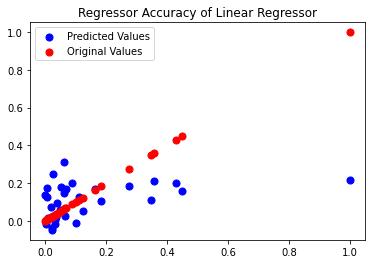

In [ ]:
linearRegression(X_train_internal,y_train,X_test_internal,y_test)

In [ ]:
svrRegression(X_train_internal,y_train,X_test_internal,y_test)


linear  kernel - R-squared: 0.1328227586707036
rbf  kernel - R-squared: 0.06693624069180171


Decision Tree Regression R^2: -1.008819423979781
Decision Tree Regression- Root Mean Squared Error: 0.28332739209913343


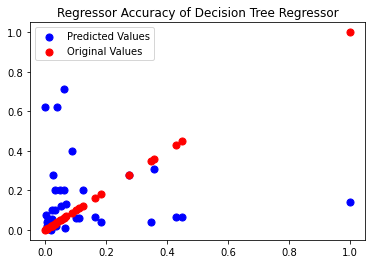

In [ ]:
decisionTreeRegression(X_train_internal,y_train,X_test_internal,y_test)

Random Decision Tree Regression R^2: -0.054533568152297374
Random Decision Tree Regression- Root Mean Squared Error: 0.20528079410117223


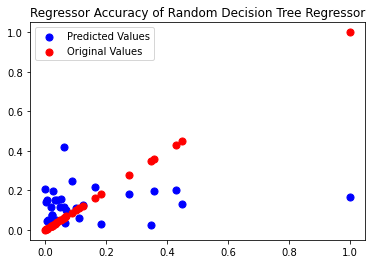

In [ ]:
randomDecTreeRegression(X_train_internal,y_train,X_test_internal,y_test)

Multi-layer Perceptron Regressor Regression R^2: 0.08332213580963233
Random Decision Tree Regression- Root Mean Squared Error: 0.19139319251961803


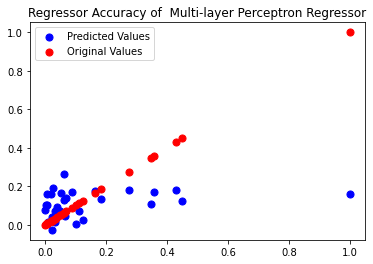

In [ ]:
mlpRegressor(X_train_internal,y_train,X_test_internal,y_test)

**Evaluation of Experiment-1**

The models (which we trained using only internal metrics) did not give sufficiently precise results.

> Best positive result is given by Linear Regressor(0.13)

> Linear Kernel of the SVR also gave positive R^2 value (0.13)

> RBF kernel of the SVR and MLP Regressor also gave positive R^2 values but they are too small

> The other two DecisionTree-based models calculated R ^ 2 negatively.This can show that these two models don't fit our data very well

In our analysis based on these models; We cannot make an exact judgment between Technical Debt and internal metrics. 3 models returned positive R ^ 2 values, while the other two models returned negative values. Therefore, we cannot make a definite judgment about the 13th hypothesis specific to these models.

# **Experiment-2** 
In this section, we will work with machine learning models that try to predict Technical Debt using external metrics.

As in the first experiment, we will first divide the data into train and test sets and then run our prediction algorithms.

In [ ]:
X_train_external, X_test_external, y_train, y_test = train_test_split(x_external, y, test_size = 0.3,random_state=random_state_fixed)

Linear Regression R^2: 0.915452378417856
Linear Regression- Root Mean Squared Error: 0.058125782444788804


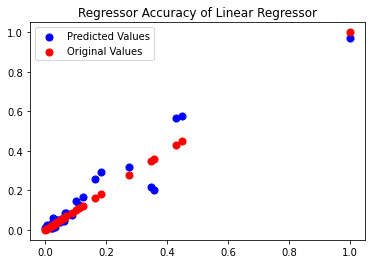

In [ ]:
linearRegression(X_train_external,y_train,X_test_external,y_test)

In [ ]:
svrRegression(X_train_external,y_train,X_test_external,y_test)

linear  kernel - R-squared: 0.8405831146332071
rbf  kernel - R-squared: 0.4383741845531993


Decision Tree Regression R^2: 0.5496495465366313
Decision Tree Regression- Root Mean Squared Error: 0.13415084630318863


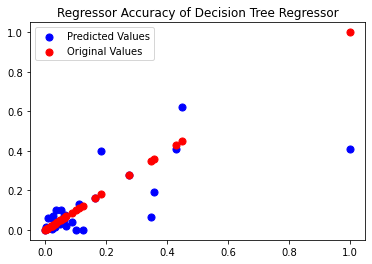

In [ ]:
decisionTreeRegression(X_train_external,y_train,X_test_external,y_test)

Random Decision Tree Regression R^2: 0.7529687482829753
Random Decision Tree Regression- Root Mean Squared Error: 0.09935599206000759


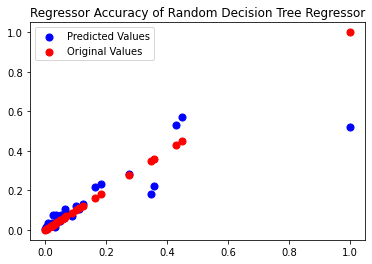

In [ ]:
randomDecTreeRegression(X_train_external,y_train,X_test_external,y_test)

Multi-layer Perceptron Regressor Regression R^2: 0.6855202404511007
Random Decision Tree Regression- Root Mean Squared Error: 0.11210228474381544


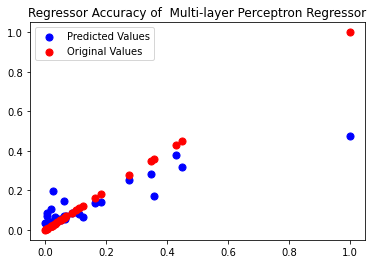

In [ ]:
mlpRegressor(X_train_external,y_train,X_test_external,y_test)

**Evaluation of Experiment-2**

In this experiment, we see that all machine learning models have a good R ^ 2 value. For this type of researches, R ^ 2 value exceeding 0.3 is generally considered good.

In this case, we can see that there is a serious relationship between external trustworthiness and Technical debt.

Based on the results of this experiment, we can validate Hypothesis 14:
> **H14**- Software components with technical debt less likely indicate a trustworthy software with respect to external trustworthiness

# **Experiment-3** 

In this section, we will try to estimate Technical Debt using all internal and external metrics.

In the second experiment, within the scope of the results we obtained, we saw that there is a significant relationship between External trustworthiness and Technical Debt.
In this experiment, we will see if we can get better results than in experiment 2 by using all internal and external metrics together.

If we can get better results, we can prove that there is also a significant relationship between internal trustworthiness and Technical debt.

In [ ]:
X_train_all, X_test_all, y_train, y_test = train_test_split(x_all, y, test_size = 0.3,random_state=random_state_fixed)

Linear Regression R^2: 0.9044898683161023
Linear Regression- Root Mean Squared Error: 0.06177927914396809


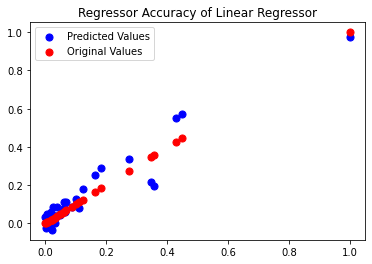

In [ ]:
linearRegression(X_train_all,y_train,X_test_all,y_test)

In [ ]:
svrRegression(X_train_all,y_train,X_test_all,y_test)

linear  kernel - R-squared: 0.8655736212214604
rbf  kernel - R-squared: 0.6237317453905658


Decision Tree Regression R^2: 0.7655199899362891
Decision Tree Regression- Root Mean Squared Error: 0.0967990347435226


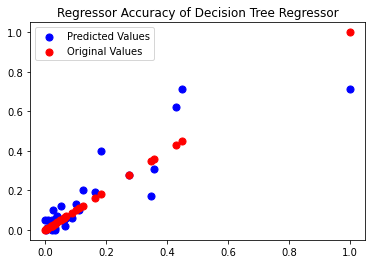

In [ ]:
decisionTreeRegression(X_train_all,y_train,X_test_all,y_test)

Random Decision Tree Regression R^2: 0.783279431017217
Random Decision Tree Regression- Root Mean Squared Error: 0.09306109979872579


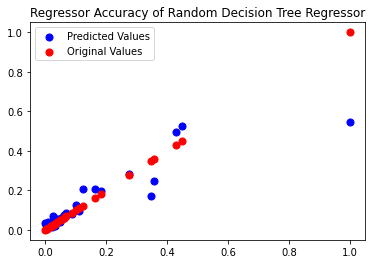

In [ ]:
randomDecTreeRegression(X_train_all,y_train,X_test_all,y_test)

Multi-layer Perceptron Regressor Regression R^2: 0.8068956242591833
Random Decision Tree Regression- Root Mean Squared Error: 0.08784441846199804


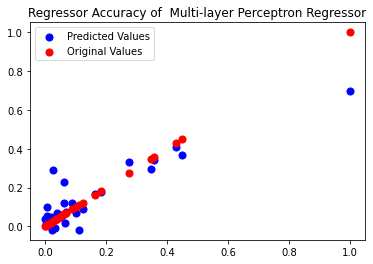

In [ ]:
mlpRegressor(X_train_all,y_train,X_test_all,y_test)

**Evaluation of Experiment-3**


When we examine Experiment-2 and Experiment-3, we see that the prediction results in the third experiment are better. The only exception is in the Linear Regression model. This model gave better results in the second experiment (ie with external metrics only).

The reason for this is clear when we look at the correlation table. There is a serious relationship between the Code Smells metric and the Technical Debt metric.
There is a relationship between these two values very similar to the Linear relationship. To prove this, let's examine the graph below:

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


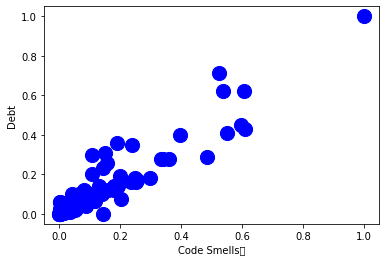

In [ ]:
plt.scatter(data.iloc[:, 4],data.iloc[:, 6],color="b",s=200, cmap='viridis')
plt.xlabel("Code Smells	")
plt.ylabel("Debt")
plt.show()

As seen in the graph, there is a very similar connection between Code Smells and Debt as a linear relationship.

Therefore, Linear Regression in the second experiment is highly dependent on the Code Smells value. In Experiment-3, on the other hand, since we added 10 different internal metrics, the general model moves away from the linear line. For this reason, Linear Regression gives a worse result.

All other models in Experiment-3 give better predictive results than Experiment-2. In this case, we can say that internal metrics have a positive effect on the models.

We can talk about a definite relationship between external metrics and Technical Debt (Experiment-2).

Although we cannot talk about such a definite statement for Internal metrics, we can see that it has a small positive effect when estimating Technical Debt. However, this judgment largely depends on the distribution of the data and the splitting of the test and train sets.
